In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from nas_201_api import NASBench201API as API

from random_search import RandomSearch
from reg_evo import RegularizedEvolution

api = API('API/NAS-Bench-201-v1_1-096897.pth', verbose=False)

/Users/samyvilhes/anaconda3/envs/these/lib/python3.12/site-packages/nas_201_api/api_201.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  file_path_or_dict = torch.load(f

In [15]:
print(f"Search Space size: {len(api)}")

Search Space size: 15625


In [16]:
best_test_acc = 0
for index in range(len(api)):
    test_acc = api.get_more_info(index, "cifar10", hp="200")['test-accuracy']
    if test_acc>=best_test_acc:
        best_test_acc = test_acc

print(f"Best test accuracy: {best_test_acc}")

Best test accuracy: 94.56


In [17]:
MAX_ITER=750
N_SIMU = 10

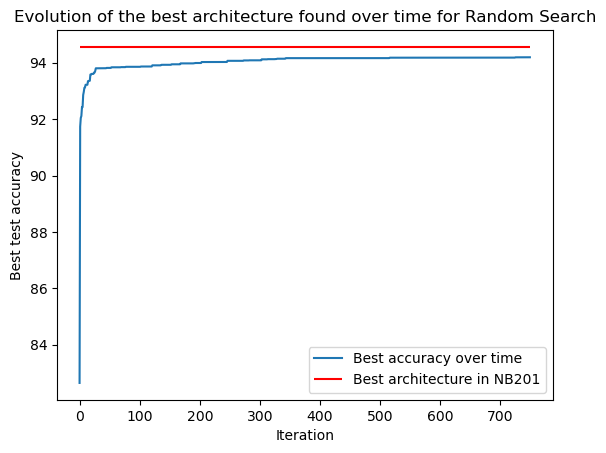

In [18]:
rs = RandomSearch(api=api, n_simu=N_SIMU, max_iter=MAX_ITER)
rs_history = rs.search()

plt.plot(rs_history, label="Best accuracy over time")
plt.hlines(best_test_acc, xmin=0, xmax=MAX_ITER, label="Best architecture in NB201", colors='red')
plt.xlabel('Iteration')
plt.ylabel('Best test accuracy')
plt.title('Evolution of the best architecture found over time for Random Search')
plt.legend()

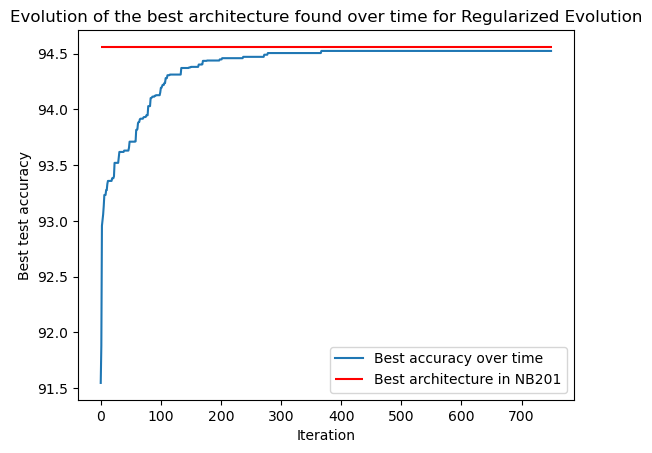

In [19]:
re = RegularizedEvolution(api=api, population_size=50, cycles=MAX_ITER, sample_size=25, n_simu=N_SIMU)
re_history = re.search()

plt.plot(re_history, label="Best accuracy over time")
plt.hlines(best_test_acc, xmin=0, xmax=MAX_ITER, label="Best architecture in NB201", colors='red')
plt.xlabel('Iteration')
plt.ylabel('Best test accuracy')
plt.title('Evolution of the best architecture found over time for Regularized Evolution')
plt.legend()

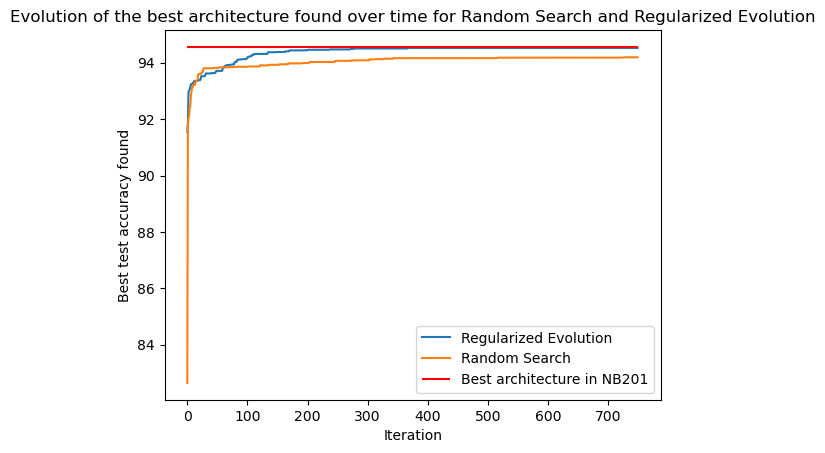

In [20]:
plt.plot(re_history, label="Regularized Evolution")
plt.plot(rs_history, label="Random Search")
plt.hlines(best_test_acc, xmin=0, xmax=MAX_ITER, label="Best architecture in NB201", colors='red')
plt.xlabel('Iteration')
plt.ylabel('Best test accuracy found')
plt.title('Evolution of the best architecture found over time for Random Search and Regularized Evolution')
plt.legend()